In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import skimage.io as io
from numpy import linalg

# Reading the image datasets

In [2]:
img_filepath = 'D:/RKMVERI MSc BDA/SEM 2/ML/ASSIGNMENTS/Assignment2/'
band1 = io.imread(img_filepath+"band1.gif").flatten()
band2 = io.imread(img_filepath+"band2.gif").flatten()
band3 = io.imread(img_filepath+"band3.gif").flatten()
band4 = io.imread(img_filepath+"band4.gif").flatten()
data = pd.DataFrame(np.array([band1,band2,band3,band4]).T)
data.columns = ["band"+str(i) for i in range(1,5)]
data

,band1,band2,band3,band4
0,41,27,26,42
1,41,27,29,41
2,38,25,26,40
3,38,23,21,39
4,37,23,22,39
...,...,...,...,...
262139,37,22,20,23
262140,37,23,19,23
262141,38,22,20,25
262142,38,23,19,31


# Annotating rhe points from River and Non-River areas

In [3]:
def draw_point(event, x, y, flags, param):
    """Take one point"""
    
    global points_pos, count_points
    
    if event == cv2.EVENT_LBUTTONDBLCLK:        
        cv2.drawMarker(img, (x, y), color=(255,255,0), markerType=cv2.MARKER_CROSS, markerSize=5)
        points_pos.append((y, x))
        count_points += 1
        print('Position of {}-th point: ({}, {})' .format(count_points, x,y))
        
        
if __name__ == '__main__':
    
    # IMAGE FILE NAME YOU WANT TO READ
    image_path = 'D:/RKMVERI MSc BDA/SEM 2/ML/ASSIGNMENTS/Assignment2/'
    img_filename = 'band4.gif'

    img = io.imread(''.join([image_path, img_filename]))
    print('Input image size: {}' .format(img.shape))

    # TO STORE ANNOTATED POINTS
    points_pos = []
    count_points = 0

    num_poins = int(input('How many points would you like to annotate? '))

    cv2.namedWindow('Move mouse pointer and double click to locate the position')
    cv2.setMouseCallback('Move mouse pointer and double click to locate the position', draw_point)

    while(1):
        cv2.imshow('Move mouse pointer and double click to locate the position', img)
        k = cv2.waitKey(20) & 0xFF
        if(k == 27 or count_points==num_poins):
            # WRITE ANNOTATED IMAGE
            img_save_filename = ''.join([image_path, 
                                         'annotated_', img_filename.split('.')[0], 
                                         '_np_', str(len(points_pos)), 
                                         '.gif'])
            io.imsave(img_save_filename, img)
            
            # SAVE ANNOTATED POINTS AS CSV FILE
            pd.DataFrame(data = np.asarray(points_pos), 
                         columns = ['row', 'column']
                        ).to_csv(''.join([image_path, 
                                          'annotated_points_', img_filename.split('.')[0], 
                                          '_np_', str(len(points_pos)), 
                                          '.csv']), 
                                 index=False)
            break

Input image size: (512, 512)
How many points would you like to annotate? 150
Position of 1-th point: (269, 117)
Position of 2-th point: (236, 65)
Position of 3-th point: (298, 38)
Position of 4-th point: (351, 84)
Position of 5-th point: (408, 61)
Position of 6-th point: (488, 31)
Position of 7-th point: (440, 23)
Position of 8-th point: (395, 20)
Position of 9-th point: (198, 14)
Position of 10-th point: (192, 58)
Position of 11-th point: (211, 103)
Position of 12-th point: (287, 83)
Position of 13-th point: (327, 116)
Position of 14-th point: (344, 61)
Position of 15-th point: (334, 31)
Position of 16-th point: (264, 18)
Position of 17-th point: (319, 6)
Position of 18-th point: (421, 48)
Position of 19-th point: (422, 125)
Position of 20-th point: (465, 105)
Position of 21-th point: (485, 195)
Position of 22-th point: (452, 195)
Position of 23-th point: (381, 182)
Position of 24-th point: (363, 153)
Position of 25-th point: (324, 200)
Position of 26-th point: (256, 171)
Position of 

In [4]:
    points_pos = []
    count_points = 0

    num_poins = int(input('How many points would you like to annotate? '))

    cv2.namedWindow('Move mouse pointer and double click to locate the position')
    cv2.setMouseCallback('Move mouse pointer and double click to locate the position', draw_point)

    while(1):
        cv2.imshow('Move mouse pointer and double click to locate the position', img)
        k = cv2.waitKey(20) & 0xFF
        if(k == 27 or count_points==num_poins):
            # WRITE ANNOTATED IMAGE
            img_save_filename = ''.join([image_path, 
                                         'annotated_', img_filename.split('.')[0], 
                                         '_np_', str(len(points_pos)), 
                                         '.gif'])
            io.imsave(img_save_filename, img)
            
            # SAVE ANNOTATED POINTS AS CSV FILE
            pd.DataFrame(data = np.asarray(points_pos), 
                         columns = ['row', 'column']
                        ).to_csv(''.join([image_path, 
                                          'annotated_points_', img_filename.split('.')[0], 
                                          '_np_', str(len(points_pos)), 
                                          '.csv']), 
                                 index=False)
            break

How many points would you like to annotate? 50
Position of 1-th point: (153, 11)
Position of 2-th point: (161, 27)
Position of 3-th point: (166, 44)
Position of 4-th point: (175, 65)
Position of 5-th point: (152, 20)
Position of 6-th point: (162, 17)
Position of 7-th point: (178, 85)
Position of 8-th point: (168, 50)
Position of 9-th point: (176, 104)
Position of 10-th point: (182, 110)
Position of 11-th point: (181, 94)
Position of 12-th point: (178, 122)
Position of 13-th point: (163, 124)
Position of 14-th point: (162, 144)
Position of 15-th point: (170, 147)
Position of 16-th point: (159, 168)
Position of 17-th point: (169, 160)
Position of 18-th point: (158, 188)
Position of 19-th point: (163, 176)
Position of 20-th point: (169, 168)
Position of 21-th point: (171, 214)
Position of 22-th point: (147, 507)
Position of 23-th point: (156, 487)
Position of 24-th point: (169, 479)
Position of 25-th point: (161, 466)
Position of 26-th point: (177, 453)
Position of 27-th point: (173, 433)

# Reading the annotated image point data stored as .csv files

In [3]:
r_cord = pd.read_csv("D:/RKMVERI MSc BDA/SEM 2/ML/ASSIGNMENTS/Assignment2/annotated_points_band4_np_50.csv")
x_cord_r = np.array(r_cord["row"])
y_cord_r = np.array(r_cord["column"])
index_r = x_cord_r*y_cord_r

In [4]:
nr_cord = pd.read_csv("D:/RKMVERI MSc BDA/SEM 2/ML/ASSIGNMENTS/Assignment2/annotated_points_band4_np_150.csv")
x_cord_nr = np.array(nr_cord["row"])
y_cord_nr = np.array(nr_cord["column"])
index_nr = x_cord_nr*y_cord_nr

In [5]:
train_data_r = data.iloc[index_r,:]
train_data_nr = data.iloc[index_nr,:]

# Calculating the mean vector and covariance matrices

In [6]:
mean_r = list(train_data_r.apply(np.mean,axis = 0))
mean_nr= list(train_data_nr.apply(np.mean,axis = 0))
cov_r = np.array(train_data_r.cov())
cov_nr = np.array(train_data_nr.cov())

In [7]:
print(cov_r)
print("----------------------------------------------------")
print(cov_nr)

[[ 9.57387755  9.51591837 13.44408163 -2.20571429]
 [ 9.51591837 10.49632653 14.88653061 -0.58204082]
 [13.44408163 14.88653061 26.09142857  2.10530612]
 [-2.20571429 -0.58204082  2.10530612 49.44326531]]
----------------------------------------------------
[[ 7.21771812  7.06416107  9.22791946  2.99489933]
 [ 7.06416107  8.08572707 10.49243848  3.94469799]
 [ 9.22791946 10.49243848 17.03337808  5.64536913]
 [ 2.99489933  3.94469799  5.64536913 33.13114094]]


In [8]:
cov_r_inv = linalg.inv(cov_r)
cov_nr_inv = linalg.inv(cov_nr)

In [9]:
band1 = io.imread(img_filepath+"band1.gif")
band2 = io.imread(img_filepath+"band2.gif")
band3 = io.imread(img_filepath+"band3.gif")
band4 = io.imread(img_filepath+"band4.gif")
data_mat = np.array([band1,band2,band3,band4])

# Calculating the likelihoods

In [15]:
def likelihood(i,j):
    x_r = np.subtract(data_mat.T[i,j,:], mean_r)
    x_nr = np.subtract(data_mat.T[i,j,:], mean_nr)
    
    river_cls = np.dot(np.dot(x_r.T, cov_r_inv), x_r)
    non_river_cls = np.dot(np.dot(x_nr.T , cov_nr_inv), x_nr)
    
    det_cov_r = linalg.det(cov_r)
    det_cov_nr = linalg.det(cov_nr)
    
    p_r = (0.5) * 1/np.sqrt(det_cov_r) * np.exp(-river_cls)
    p_nr = (0.5) * 1/np.sqrt(det_cov_nr) * np.exp(-non_river_cls)

    return p_r,p_nr

# The prediction function of the Naive-Bayes classifier

In [16]:
def prediction(P1,P2):
    pred = np.ndarray(shape = (512,512), dtype = np.int64)
    for i in range(512):
        for j in range(512):
            p_r, p_nr = likelihood(i,j)
            if(P1*p_r > P2*p_nr):
                pred[i,j] = 255
            else:
                pred[i,j] = 0
    return pred.T

# Predictions for different set of prior probabilities

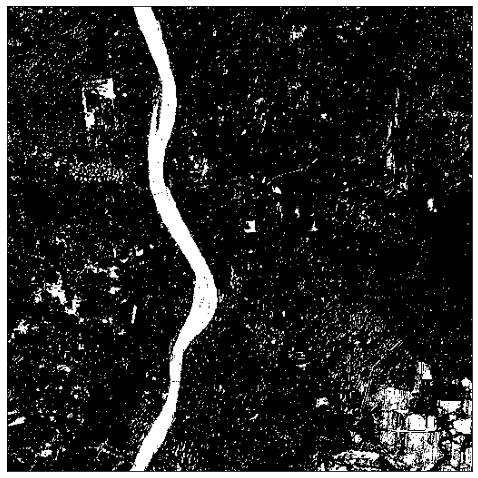

In [17]:
pred1 = prediction(0.2,0.8)
plt.subplot(1,1,1)
plt.imshow(pred1.reshape(512,512), cmap='gray')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()

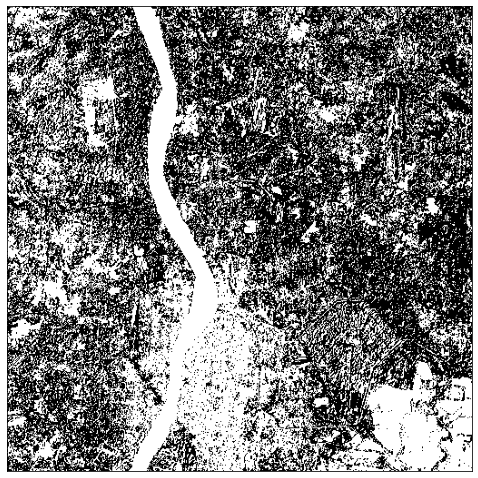

In [18]:
pred1 = prediction(0.5,0.5)
plt.subplot(1,1,1)
plt.imshow(pred1.reshape(512,512), cmap='gray')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()

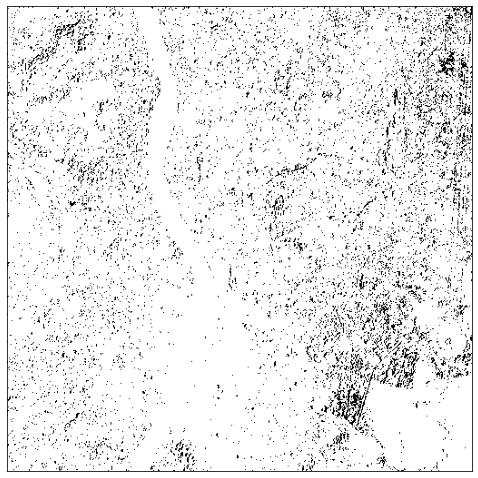

In [19]:
pred1 = prediction(0.7,0.3)
plt.subplot(1,1,1)
plt.imshow(pred1.reshape(512,512), cmap='gray')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()